## 决策树
决策树是广泛用于分类和回归任务的模型。本质上，它从一层层的 if/else 问题中进行学习，并得出结论。

学习决策树，就是学习一系列 if/else 问题，使我们能够以最快的速度得到正确答案。在机器学习中，这些问题叫作测试。

数据通常并不总是具有二元特征（是/否）的形式，而是表示为连续特征，而用于连续数据的测试形式是：“特征 i 的值是否大于 a ？”

为了构造决策树，算法搜遍所有可能的测试，找出对目标变量来说信息量最大的那一个。

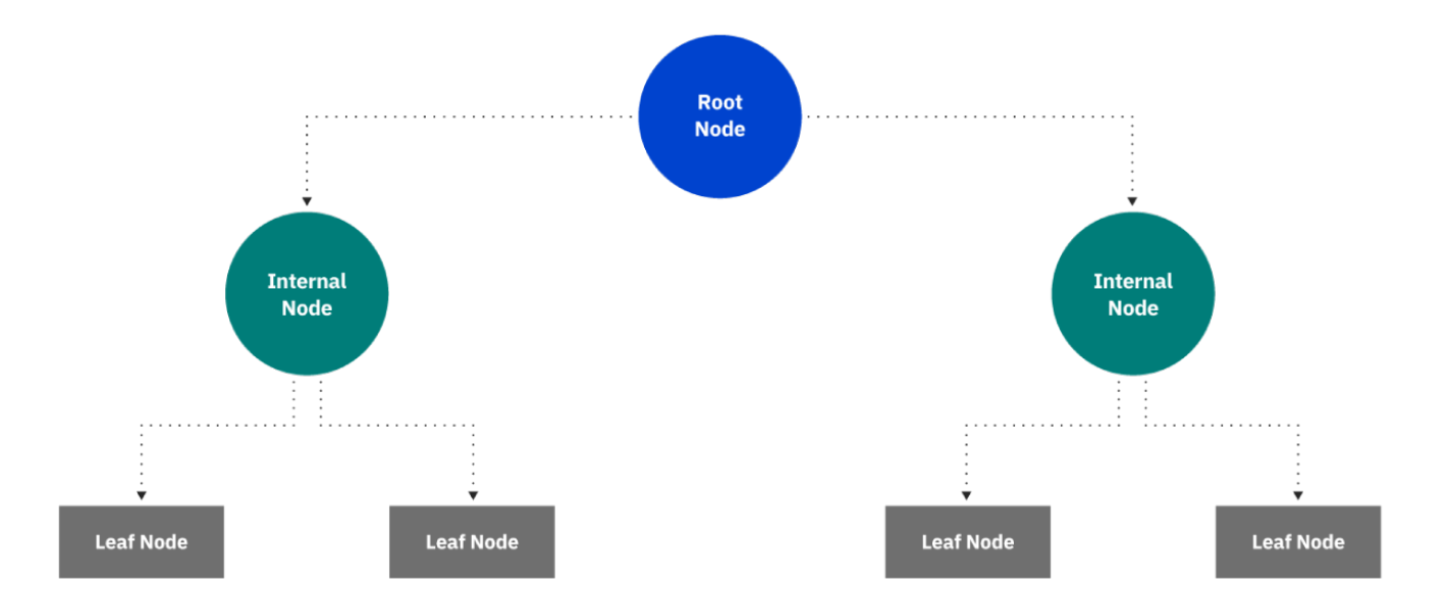

从上图中可以看出，决策树从根节点开始，根节点没有任何传入分支。然后，根节点的传出分支为内部节点（也称为决策节点）提供信息。两种节点都基于可用功能执行评估以形成同类子集，这些子集由叶节点或终端节点表示。叶节点表示数据集内所有可能的结果。

## 数据集介绍
威斯康星州乳腺癌数据集（简称cancer)，包含在scikit-learn中，里面记录了乳腺癌肿瘤的临床测量数据。每个肿瘤都被标记为“良性”（benign，表示无害肿瘤）或“恶性”（malignant，表示癌性肿瘤），其任务是基于人体组织的测量数据来学习预测肿瘤是否为恶性。

In [1]:
# 可以用 scikit-learn 模块的 load_breast_cancer 函数来加载数据
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
# 这个数据集共包含 569 个数据点，每个数据点有 30 个特征：
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [3]:
# 在 569 个数据点中，212 个被标记为恶性，357 个被标记为良性：
import numpy as np
print("Sample counts per class:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [4]:
# 为了得到每个特征的语义说明，我们可以看一下 feature_names 属性：
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 训练数据与测试数据
在构建用于预测的机器学习模型时，我们首先需要知道模型是否有效。但是我们不能将用于构建模型的数据用于评估模型，因为模型会一直记住整个训练集，所以对于训练集中的任何数据点总会预测正确的标签。这种“记忆”无法告诉我们模型的泛化（generalize）能力如何，也就是说在新数据上能否正确预测。

我们要用新数据来评估模型的性能，通常的做法是将收集好的带标签数据分成两部分。一部分数据用于构建机器学习模型，叫作训练数据（training data）或训练集（training set）。其余的数据用来评估模型性能，叫作测试数据（test data）或测试集（test set）。

scikit-learn 中的 train_test_split 函数可以打乱数据集并进行拆分。这个函数默认将75% 的行数据及对应标签作为训练集，剩下 25% 的数据及其标签作为测试集。训练集与测试集的分配比例可以是随意的，但使用 25% 的数据作为测试集是很好的经验法则。

scikit-learn 中的数据通常用大写的 X 表示，而标签用小写的 y 表示。

In [6]:
# 对数据调用 train_test_split，并对输出结果采用下面这种命名方法：
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [7]:
# train_test_split 函数的输出为 X_train、X_test、y_train 和 y_test，它们都是 NumPy 数组。X_train 包含 75% 的行数据，X_test 包含剩下的 25%：
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


## 控制决策树的复杂度
通常来说，构造决策树直到所有叶结点都是纯的叶结点，这会导致模型非常复杂，并且对训练数据高度过拟合。纯叶结点的存在说明这棵树在训练集上的精度是 100%。训练集中的每个数据点都位于分类正确的叶结点中。

防止过拟合有两种常见的策略：一种是及早停止树的生长，也叫预剪枝（pre-pruning）；另一种是先构造树，但随后删除或折叠信息量很少的结点，也叫后剪枝（post-pruning）。预剪枝的限制条件可能包括限制树的最大深度、限制叶结点的最大数目，或者规定一个结点中数据点的最小数目来防止继续划分。

In [29]:
# 限制树的深度可以减少过拟合，这会降低训练集的精度，但可以提高测试集的精度：
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


我们可以利用 tree 模块的 export_graphviz 函数来将树可视化。这个函数会生成一个 .dot 格式的文件。我们设置为结点添加颜色的选项，颜色表示每个结点中的多数类别，同时传入类别名称和特征名称，这样可以对树正确标记。

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant","benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

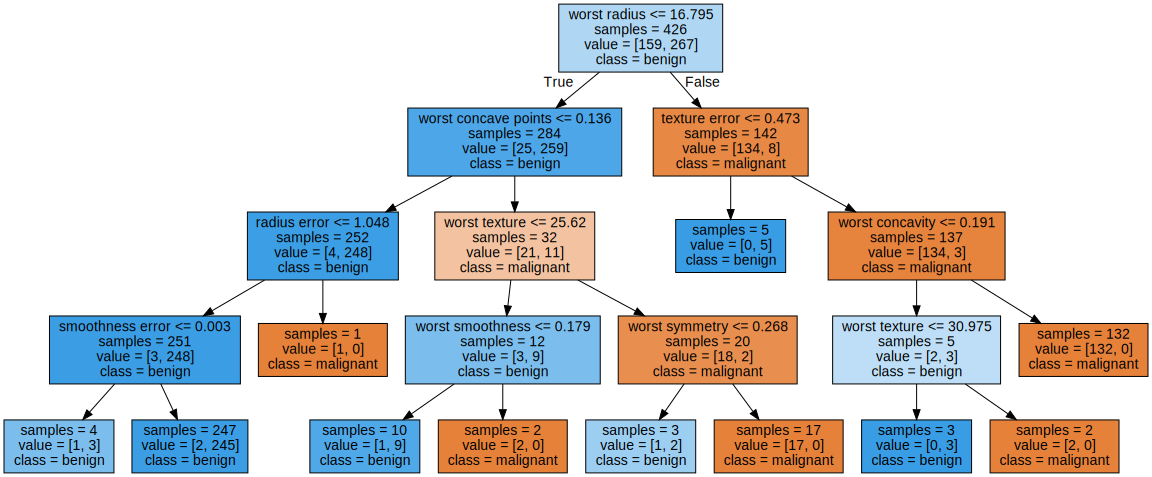

In [31]:
# 可以利用 graphviz 模块读取这个文件并将其可视化
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

图中每个结点的 samples 给出了该结点中的样本个数，values 给出的是每个类别的样本个数。观察 worst radius <= 16.795 分支右侧的子结点，我们发现它只包含
8 个良性样本，但有 134 个恶性样本。树的这一侧的其余分支只是利用一些更精细的区别将这 8 个良性样本分离出来。在第一次划分右侧的 142 个样本中，几乎所有样本（132 个）最后都进入最右侧的叶结点中。

In [32]:
# 查看数的特征重要性（feature importance），它为每个特征对树的决策的重要性进行排序。特征重要性的求和始终为 1：
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


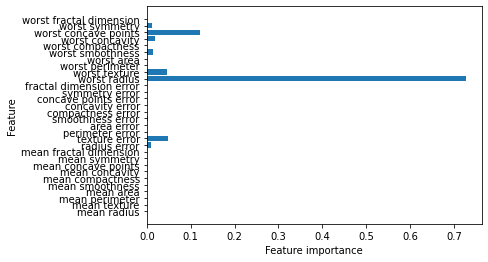

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

这里我们看到，顶部划分用到的特征（“worst radius”）是最重要的特征。这也证实了我们在分析树时的观察结论，即第一层划分已经将两个类别区分得很好。

但是，如果某个特征的 feature importance 很小，并不能说明这个特征没有提供任何信息。这只能说明该特征没有被树选中，可能是因为另一个特征也包含了同样的信息。

与线性模型的系数不同，特征重要性始终为正数，也不能说明该特征对应哪个类别。特征重要性告诉我们“worst radius”（最大半径）特征很重要，但并没有告诉我们半径大表示样本是良性还是恶性。事实上，在特征和类别之间可能没有这样简单的关系。

## 决策树的优缺点
决策树主要有两个优点：一是得到的模型很容易可视化，非专家也很容易理解；二是算法完全不受数据缩放的影响。由于每个特征被单独处理，而且数据的划分也不依赖于缩放，因此决策树算法不需要特征预处理，比如归一化或标准化。特别是特征的尺度完全不一样时或者二元特征和连续特征同时存在时，决策树的效果很好。

决策树的主要缺点在于，即使做了预剪枝，它也经常会过拟合，泛化性能比较差。因此，在大多数应用中，往往使用集成方法来替代单棵决策树。

## 决策树集成
集成（ensemble）是合并多个机器学习模型来构建更强大模型的方法。已证明有两种集成模型对大量分类和回归的数据集都是有效的，二者都以决策树为基础，分别是随机森林（random forest）和梯度提升决策树（gradient boosted decision tree）。

随机森林本质上是许多决策树的集合，其中每棵树都和其他树略有不同。随机森林背后的思想是，每棵树的预测可能都相对较好，但可能对部分数据过拟合。

如果构造很多树，并且每棵树的预测都很好，但都以不同的方式过拟合，那么我们可以对这些树的结果取平均值来降低过拟合。这样既能减少过拟合又能保持树的预测能力。

梯度提升回归树通过合并多个决策树来构建一个更为强大的模型。虽然名字中含有“回归”，但这个模型既可以用于回归也可以用于分类。与随机森林方法不同，梯度提升采用连续的方式构造树，每棵树都试图纠正前一棵树的错误。默认情况下，梯度提升回归树中没有随机化，而是用到了强预剪枝。梯度提升树通常使用深度很小（1 到 5 之间）的树，这样模型占用的内存更少，预测速度也更快。

梯度提升背后的主要思想是合并许多简单的模型（在这个语境中叫作弱学习器），比如深度较小的树。每棵树只能对部分数据做出好的预测，因此，添加的树越来越多，可以不断迭代提高性能。

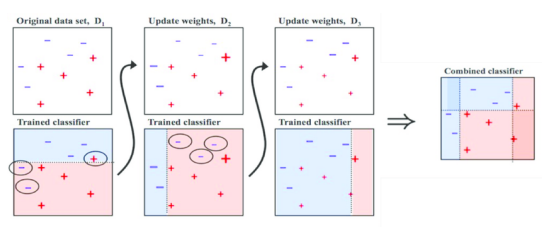

除了预剪枝与集成中树的数量之外，梯度提升的另一个重要参数是 learning_rate（学习率），用于控制每棵树纠正前一棵树的错误的强度。较高的学习率意味着每棵树都可以做出较强的修正，这样模型更为复杂。通过增大 n_estimators 来向集成中添加更多树，也可以增加模型复杂度，因为模型有更多机会纠正训练集上的错误。

In [14]:
# 默认使用 100 棵树，最大深度是 3，学习率为 0.1 。在乳腺癌数据集上应用 GradientBoostingClassifier：
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [15]:
# 由于训练集精度达到 100%，所以很可能存在过拟合。为了降低过拟合，我们可以限制最大深度来加强预剪枝：
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [16]:
# 也可以通过降低学习率来降低过拟合：
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


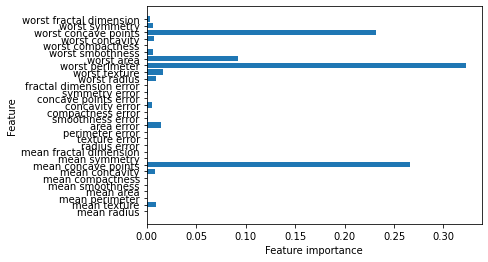

In [17]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

## XGBoost
XGBoost（eXtreme Gradient Boosting）是大规模并行 boosting tree 的工具，在并行计算效率、缺失值处理、预测性能上都非常强大。

优点

1. 精度更高：GBDT 只用到一阶泰勒展开，而 XGBoost 对损失函数进行了二阶泰勒展开。XGBoost 引入二阶导一方面是为了增加精度，另一方面也是为了能够自定义损失函数，二阶泰勒展开可以近似大量损失函数；

2. 灵活性更强：GBDT 以 CART 作为基分类器，XGBoost 不仅支持 CART 还支持线性分类器。此外，XGBoost 工具支持自定义损失函数，只需函数支持一阶和二阶求导；

3. 正则化：XGBoost 在目标函数中加入了正则项，用于控制模型的复杂度。正则项里包含了树的叶子节点个数、叶子节点权重的 L2 范式。正则项降低了模型的方差，使学习出来的模型更加简单，有助于防止过拟合；

4. Shrinkage（缩减）：相当于学习速率。XGBoost 在进行完一次迭代后，会将叶子节点的权重乘上该系数，主要是为了削弱每棵树的影响，让后面有更大的学习空间；

5. 列抽样：XGBoost 借鉴了随机森林的做法，支持列抽样，不仅能降低过拟合，还能减少计算；

6. 缺失值处理：XGBoost 采用的稀疏感知算法极大的加快了节点分裂的速度；

7. 可以并行化操作：块结构可以很好的支持并行计算。

In [18]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=20)
xgb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.986


Reference:

1. Introduction to Machine Learning with Python - Andreas C. Muller, Sarah Guido

2. https://www.datacamp.com/tutorial/xgboost-in-python

3. Deep Learning - Ian Goodfellow, Yoshua Bengio, Aaron Courville

4. https://xgboost.readthedocs.io/en/stable/tutorials/model.html